Find articles that made it to certain journals and compare key words. This time we'll only look at articles in the physics.atom-ph section.

In [2]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_, and_

engine = create_engine("sqlite:///../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [3]:
query = session.query(Article_Category)\
                    .join(Category)\
                    .join(Article)\
                    .filter(Category.name.like('%atom-ph'),
                            or_(Article.journal_ref.like('Physics Review Letters%'),
                                Article.journal_ref.like('Phys. Rev. Lett.%'),
                                Article.journal_ref.like('PRL%')))
resultPRL = query.all()

In [4]:
#for item in resultPRL:
#    print "%s - %s" % (item.article.journal_ref, item.category.name)

In [5]:
query = session.query(Article_Category)\
                    .join(Category)\
                    .join(Article)\
                    .filter(Category.name.like('%atom-ph'),
                            or_(Article.journal_ref.like('Nature%'),
                                Article.journal_ref.like('Nat.%'),
                                Article.journal_ref.like('Science%')))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultNatureScience = query.all()

In [6]:
# for item in resultNatureScience:
#    print "%s - %s" % (item.article.journal_ref, item.category.name)

In [7]:
abstract = dict()
abstractPRL = dict()
title = dict()
titlePRL = dict()

numWords = 0
numArticles = len(resultPRL)

start = time.time()
for item in resultPRL[0:10]:
#     print item.abstract
    for word in set((item.article.abstract).replace('\n',' ') \
                                           .replace('\\','') \
                                           .replace('(','') \
                                           .replace(')','') \
                                           .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractPRL.keys():
#                 abstractPRL[word] += 1
#             else:
#                 abstractPRL[word] =1
            if word in abstract.keys():
                abstract[word] -= 1./numArticles
            else:
                abstract[word] = -1./numArticles
            numWords += 1
            
    for word in set((item.article.title).replace('\n',' ') \
                                        .replace('\\','') \
                                        .replace('(','') \
                                        .replace(')','') \
                                        .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titlePRL.keys():
#                 titlePRL[word] += 1
#             else:
#                 titlePRL[word] =1
            if word in title.keys():
                title[word] -= 1./numArticles
            else:
                title[word] = -1./numArticles
            numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

0.023027 sec., 119 articles, 404 words
5168 articles per second
17544 words per second


In [8]:
abstractNature = dict()
titleNature = dict()

numWords = 0
numArticles = len(resultNatureScience)

start = time.time()
for item in resultNatureScience[0:10]:
#     print item.abstract
    for word in set((item.article.abstract).replace('\n',' ') \
                                           .replace('\\','') \
                                           .replace('(','') \
                                           .replace(')','') \
                                           .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractNature.keys():
#                 abstractNature[word] += 1
#             else:
#                 abstractNature[word] =1
            if word in abstract.keys():
                abstract[word] += 1./numArticles
            else:
                abstract[word] = 1./numArticles
        numWords += 1

    for word in set((item.article.title).replace('\n',' ') \
                                        .replace('\\','') \
                                        .replace('(','') \
                                        .replace(')','') \
                                        .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titleNature.keys():
#                 titleNature[word] += 1
#             else:
#                 titleNature[word] =1
            if word in title.keys():
                title[word] += 1./numArticles
            else:
                title[word] = 1./numArticles
        numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

0.024992 sec., 9 articles, 1004 words
360 articles per second
40172 words per second


In [9]:
session.close_all()

In [10]:
# Want to sort dictionary by values. Convert it to a list of tuples so we can use python's sort functions
abstract_wordlist = sorted([(key, val) for key, val in abstract.iteritems()], key=lambda x: x[1])
title_wordlist = sorted([(key, val) for key, val in title.iteritems()], key=lambda x: x[1])

In [11]:
abstract_best_and_worst = abstract_wordlist[0:10] + abstract_wordlist[-11:-1]
print abstract_best_and_worst

[(u'Fermi', -0.03361344537815126), (u'via', -0.025210084033613446), (u'problem', -0.025210084033613446), (u'case', -0.01680672268907563), (u'linear', -0.01680672268907563), (u'study', -0.01680672268907563), (u'degenerate', -0.01680672268907563), (u'arise', -0.01680672268907563), (u'parameter', -0.01680672268907563), (u'repulsive', -0.01680672268907563), (u'key', 0.3333333333333333), (u'within', 0.3333333333333333), (u'frequency', 0.4360410830999066), (u'effects', 0.4444444444444444), (u'precision', 0.4444444444444444), (u'demonstrate', 0.4444444444444444), (u'quantum', 0.5387488328664799), (u'also', 0.5555555555555556), (u'atoms', 0.6330532212885154), (u'optical', 0.649859943977591)]


In [12]:
title_best_and_worst = title_wordlist[0:10] + title_wordlist[-11:-1]
print title_best_and_worst

[(u'cold', -0.01680672268907563), (u'scattering', -0.01680672268907563), (u'gases', -0.01680672268907563), (u'fermion', -0.01680672268907563), (u'Lattice', -0.008403361344537815), (u'Molecular', -0.008403361344537815), (u'Gas', -0.008403361344537815), (u'production', -0.008403361344537815), (u'fermionic', -0.008403361344537815), (u'electron', -0.008403361344537815), (u'Atoms', 0.1111111111111111), (u'Directed', 0.1111111111111111), (u'effect', 0.1111111111111111), (u'remote', 0.1111111111111111), (u'spectra', 0.1111111111111111), (u'deeply', 0.1111111111111111), (u'Quantum', 0.20541549953314658), (u'optical', 0.2138188608776844), (u'Ultracold', 0.2222222222222222), (u'quantum', 0.2222222222222222)]


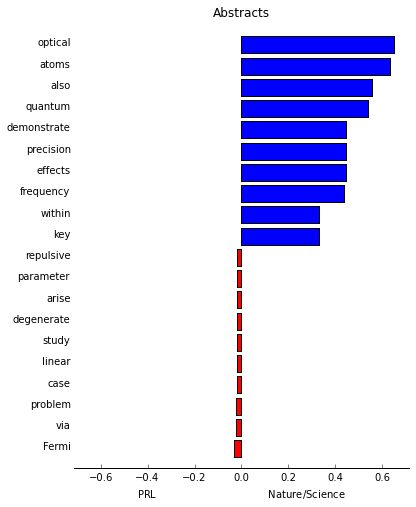

In [13]:
words = [x for (x,y) in abstract_best_and_worst]
vals = np.array([y for (x,y) in abstract_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Abstracts')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

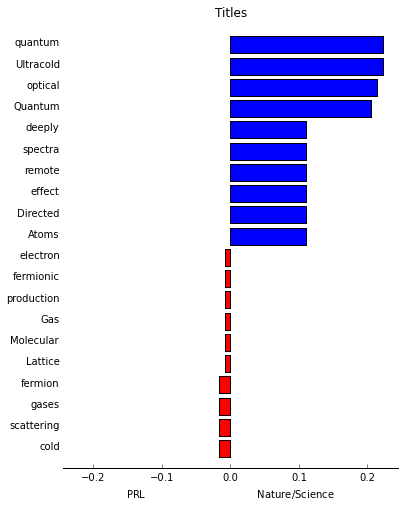

In [16]:
words = [x for (x,y) in title_best_and_worst]
vals = np.array([y for (x,y) in title_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Titles')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

The above plots are fun but they are descriptive, not predictive. Given words in the abstract or title, can I predict where an article will end up?

Bits of the code are based on https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [18]:
print words

[u'cold', u'scattering', u'gases', u'fermion', u'Lattice', u'Molecular', u'Gas', u'production', u'fermionic', u'electron', u'Atoms', u'Directed', u'effect', u'remote', u'spectra', u'deeply', u'Quantum', u'optical', u'Ultracold', u'quantum']
